In [33]:

import warnings
warnings.filterwarnings("ignore")


In [34]:
from sklearn.ensemble import  RandomForestRegressor


import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import f1_score

In [35]:
from sklearn.datasets import load_diabetes

# Load the Iris dataset
data=load_diabetes()
data.keys()

df = pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target

df



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


#correlation

In [36]:
corr_df=pd.DataFrame(df.corr()["target"].sort_values(ascending=False)[:10])
corr_df.style.background_gradient(cmap='Blues')

,target
target,1.000000
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


In [37]:
# Separate features and target
X = df[data.feature_names]
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

# Display the shape of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (309, 10) (309,)
Testing set shape: (133, 10) (133,)


100%|██████████| 49/49 [00:05<00:00,  8.83it/s]


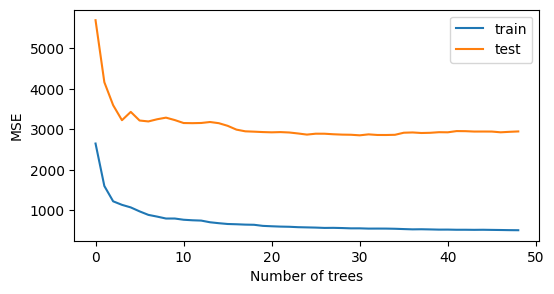

In [48]:

from tqdm import tqdm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 3)



train_mse, test_mse = [], []
n_trees = 50
from sklearn.metrics import mean_squared_error,r2_score
for i in tqdm(range(1, n_trees)):
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(X_train, y_train)
    train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(train_mse, label='train')
plt.plot(test_mse, label='test')
plt.xlabel('number of trees')
plt.ylabel('MSE')
plt.xlabel('Number of trees')
plt.legend();

usually when increasing n_trees randomforest model is not overfiting

In [39]:
pd.DataFrame({"n_trees": np.arange(49),"f1": test_mse}).sort_values(by="n_trees").reset_index(drop=True)[20:25]


,n_trees,f1
20,20,2927.861337
21,21,2933.557929
22,22,2923.757721
23,23,2899.644672
24,24,2871.881191


Number of trees =22

100%|██████████| 29/29 [00:01<00:00, 15.95it/s]


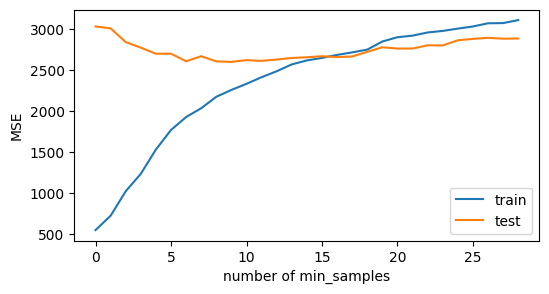

In [49]:

min_samples_leaf_array = range(1, 30)
train_mse_array = []
test_mse_array = []
for  min_samples_leaf in tqdm(min_samples_leaf_array):
    model = RandomForestRegressor(n_estimators=22, min_samples_leaf=min_samples_leaf, random_state=13)
    model.fit(X_train, y_train)
    train_mse_array.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse_array.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(train_mse_array, label='train')
plt.plot(test_mse_array, label='test')
plt.xlabel('number of min_samples')
plt.ylabel('MSE')
plt.legend();

Min_samples = 19

100%|██████████| 7/7 [00:00<00:00, 14.17it/s]


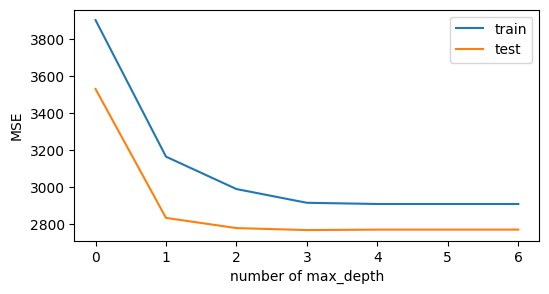

In [50]:

max_depth_array = range(1, 8)
train_mse_depth = []
test_mse_depth = []
for  max_depth in tqdm(max_depth_array):
    model = RandomForestRegressor(n_estimators=19, min_samples_leaf=21,max_depth=max_depth, random_state=13)
    model.fit(X_train, y_train)
    train_mse_depth.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse_depth.append(mean_squared_error(y_test, model.predict(X_test)))

plt.plot(train_mse_depth, label='train')
plt.plot(test_mse_depth, label='test')
plt.xlabel('number of max_depth')
plt.ylabel('MSE')
plt.legend();

Max_dept= 3

In [42]:

model = RandomForestRegressor( n_estimators=22,
                               min_samples_leaf=19,
                               max_depth=3,
                               random_state=13)
model.fit(X_train, y_train)
print(mean_squared_error(y_train, model.predict(X_train)))
print(mean_squared_error(y_test, model.predict(X_test)))

2871.847487429173
2704.395157778079


In [43]:
print(r2_score(y_train, model.predict(X_train)))
print(r2_score(y_test, model.predict(X_test)))

0.5329024329153125
0.499029088917063


In [44]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators =np.arange(1,50,1)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 6, num = 8)]
max_depth.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 30, num = 15)]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 1, 2, 3, 3, 4, 5, 6, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30],
 'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}


In [45]:

 #Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error',
                              cv = 5, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [46]:

rf_random.best_params_

{'n_estimators': 46,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 6,
 'bootstrap': False}

In [47]:
best=rf_random.best_estimator_
print(r2_score(y_train, best.predict(X_train)))
print(r2_score(y_test, best.predict(X_test)))

0.8422605411385908
0.46155355961419686
